# 準備工作

In [97]:
import pandas as pd
import numpy as np

file_path = r'C:\Users\USER\Desktop\VS code\Paper-reproduction\data\extracted_data\cs-training.csv'

df = pd.read_csv(file_path)


In [98]:
df.set_index('Unnamed: 0',inplace = True)
ISNAMonIncome = np.where(df['MonthlyIncome'].isna(), 1, 0)
df.insert(loc=6, column='ISNAMonIncome', value=ISNAMonIncome)
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(0)

ISNANOfDependents = np.where(df['NumberOfDependents'].isna(), 1, 0)
df.insert(loc=12, column='ISNANOfDependents', value=ISNANOfDependents)
df['NumberOfDependents']  = df['NumberOfDependents'].fillna(0)

df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,ISNAMonIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,ISNANOfDependents
Unnamed: 0,,,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,0,13,0,6,0,2.0,0
2,0,0.957151,40,0,0.121876,2600.0,0,4,0,0,0,1.0,0
3,0,0.658180,38,1,0.085113,3042.0,0,2,1,0,0,0.0,0
4,0,0.233810,30,0,0.036050,3300.0,0,5,0,0,0,0.0,0
5,0,0.907239,49,1,0.024926,63588.0,0,7,0,1,0,0.0,0


## Z-SCORE,Log-transform

In [99]:
from scipy.stats import zscore

#Only Z score
df[['age','NumberOfDependents','NumberOfOpenCreditLinesAndLoans']] = df[['age','NumberOfDependents','NumberOfOpenCreditLinesAndLoans']].apply(zscore)

#Z score and log transform
select_cols = [1, 3, 4, 5, 8, 9, 10]
col_names = df.columns[select_cols].tolist()
df[col_names] = df[col_names].astype(float)
log_transformed = np.log(df[col_names]+1e-20)
z_score_scaled = log_transformed.apply(zscore)
df[col_names] = z_score_scaled

df.rename(columns={df.columns[0]: 'y'}, inplace=True)

df.rename(columns=dict(zip(df.columns[1:], ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12'])), inplace=True)
df.head()


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
Unnamed: 0,,,,,,,,,,,,,
1,1,0.424145,-0.493860,2.312234,0.113199,0.540618,0,0.883657,-0.242558,0.837190,-0.23104,1.140530,0
2,0,0.443403,-0.832342,-0.436189,-0.113303,0.484111,0,-0.865297,-0.242558,-1.291969,-0.23104,0.237202,0
3,0,0.411007,-0.967735,2.271479,-0.156436,0.491181,0,-1.253953,4.075840,-1.291969,-0.23104,-0.666126,0
4,0,0.321472,-1.509307,-0.436189,-0.259646,0.494846,0,-0.670969,-0.242558,-1.291969,-0.23104,-0.666126,0
5,0,0.438770,-0.223074,2.271479,-0.303978,0.628057,0,-0.282312,-0.242558,0.757452,-0.23104,-0.666126,0


In [100]:
from scipy.stats import skew, kurtosis
summary_statistics = df.describe().T

summary_statistics['skewness'] = df.apply(skew)
summary_statistics['excess kurtosis'] = df.apply(kurtosis) 

summary_statistics.drop(['count', '25%', '75%'], axis=1, inplace=True)

pd.DataFrame(summary_statistics)

,mean,std,min,50%,max,skewness,excess kurtosis
y,6.684000e-02,0.249746,0.000000,0.000000,1.000000,3.468822,10.032729
x1,7.550701e-17,1.000003,-3.536721,0.285451,1.384423,-3.172365,8.362265
x2,9.274951e-17,1.000003,-3.540201,-0.019984,3.838715,0.188993,-0.494692
x3,-3.556030e-16,1.000003,-0.436189,-0.436189,2.541058,1.857067,1.450629
x4,9.687066e-18,1.000003,-5.393069,0.018972,1.666032,-4.130387,20.388018
x5,-2.702431e-17,1.000003,-1.943479,0.507362,0.801716,-1.425740,0.040091
x6,1.982067e-01,0.398650,0.000000,0.000000,1.000000,1.514082,0.292443
x7,8.014922e-17,1.000003,-1.642610,-0.087984,9.628425,1.215302,3.090924
x8,1.594932e-16,1.000003,-0.242558,-0.242558,4.505785,3.882028,13.078788
x9,-1.264766e-16,1.000003,-1.291969,0.757452,0.934972,-0.517424,-1.731163


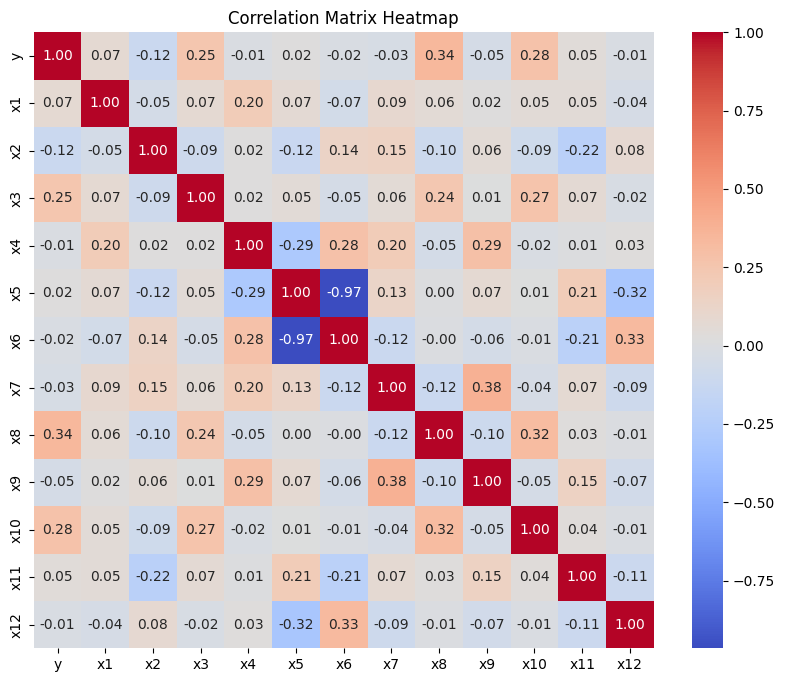

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

## Rrescaling

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif

def EW(data,y_column):
    return data

def REG(data, y_column):
    y = data[y_column]
    X = data.drop(columns=y_column)


    model = LinearRegression()
    model.fit(X, y)

    coefficients = model.coef_

    coef_mapping = dict(zip(X.columns, coefficients))

    weighted_features = X.multiply(coefficients, axis=1)

    df = pd.concat([y,weighted_features],axis=1)

    return df

def LR(data, y_column):

    y = data[y_column]
    X = data.drop(columns=y_column)

    model = LogisticRegression(solver='saga', max_iter=1000)  # 使用适合大型数据集的求解器
    model.fit(X, y)

    coefficients = model.coef_

    coef_mapping = dict(zip(X.columns, coefficients))

    weighted_features = X.multiply(coefficients, axis=1)

    df = pd.concat([y,weighted_features],axis=1)

    return df


def MI(data, y_column):

    y = data[y_column]
    X = data.drop(columns=y_column)

    mi_scores = mutual_info_classif(X, y)

    mi_mapping = dict(zip(X.columns, mi_scores))

    weighted_features = X.multiply(mi_scores, axis=1)

    df = pd.concat([y,weighted_features],axis=1)

    return df

In [104]:
df_ew = EW(df,'y')
df_lr = LR(df,'y')
df_reg = REG(df,'y')
df_mi = MI(df,'y')

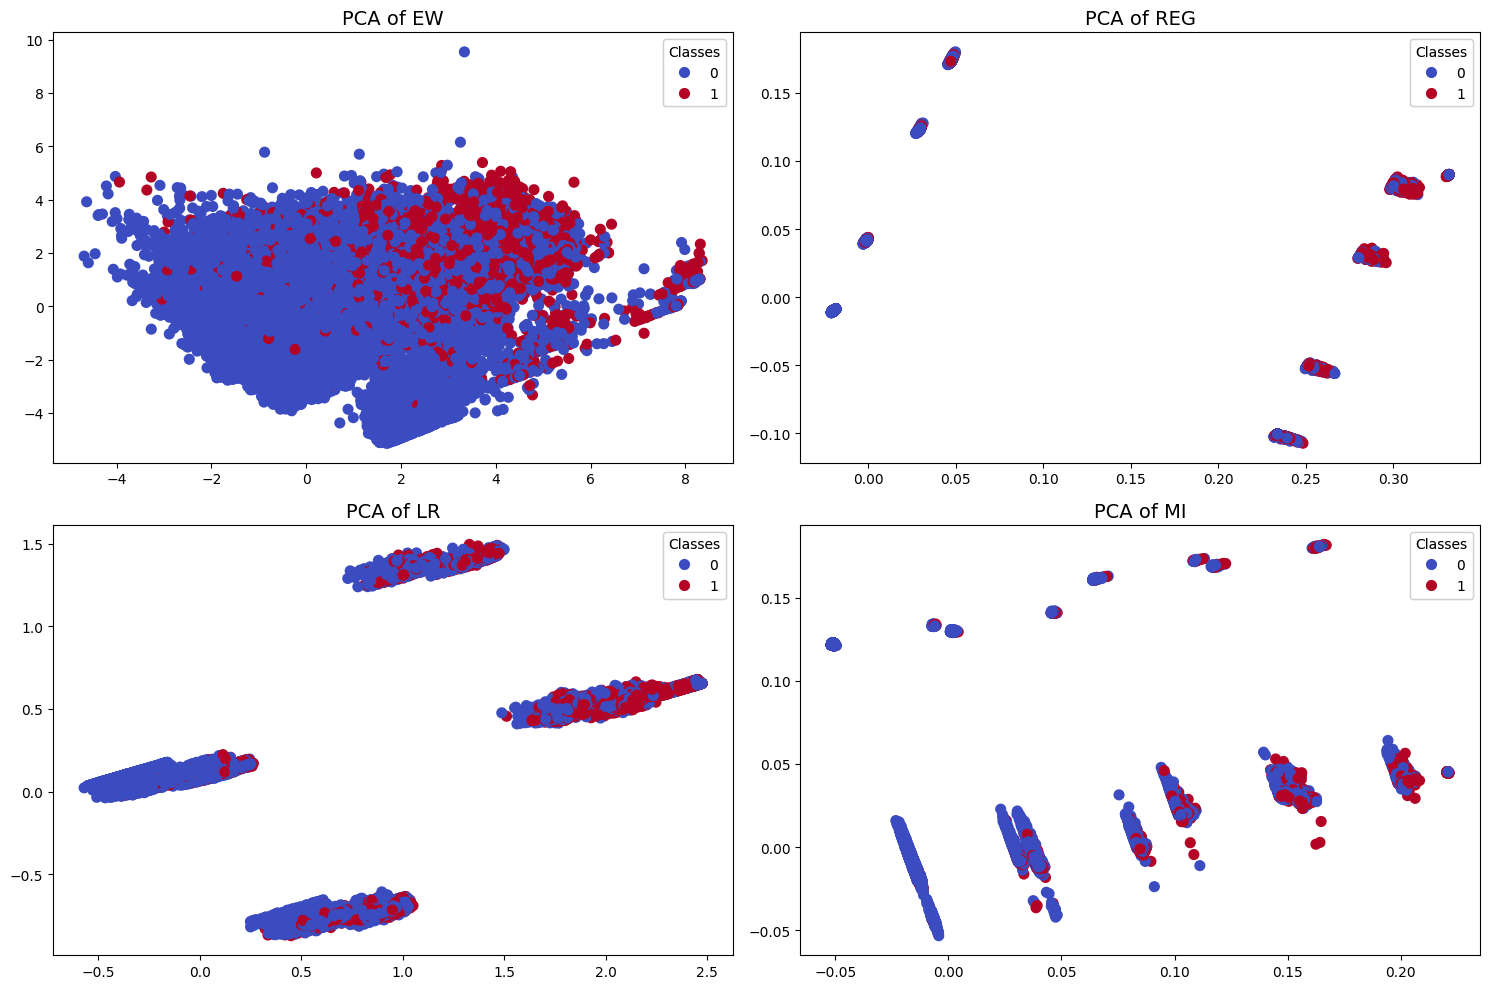

In [8]:
from sklearn.decomposition import PCA

def pca_2d_reduction(df, y_column, title, ax):

    X = df.drop(columns=y_column)
    y = df[y_column]

    pca = PCA(n_components=2, random_state=42)
    X_reduced = pca.fit_transform(X)

    ax.set_title(title, fontsize=14)
    scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', linewidths=2)

    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

pca_2d_reduction(df_ew, 'y', 'PCA of EW', axs[0, 0])
pca_2d_reduction(df_lr, 'y', 'PCA of LR', axs[1, 0])
pca_2d_reduction(df_reg, 'y', 'PCA of REG', axs[0, 1])
pca_2d_reduction(df_mi, 'y', 'PCA of MI', axs[1, 1])

plt.tight_layout()
plt.show()   

## Quar，Cubic features

In [105]:
from itertools import combinations

features = df.drop(columns='y')

new_features = {}

for col in features.columns:
    new_features[f'{col}^2'] = df[col] ** 2
        
for (col1, col2) in combinations(features.columns, 2):
    new_features[f'{col1}*{col2}'] = df[col1] * df[col2]

new_features_df = pd.DataFrame(new_features, index=df.index)

df_quar = pd.concat([df, new_features_df], axis=1)

In [10]:
new_features = {}

for col in features.columns:
    new_features[f'{col}^2'] = features[col] ** 2
    new_features[f'{col}^3'] = features[col] ** 3

for (col1, col2) in combinations(features.columns, 2):
    new_features[f'{col1}*{col2}'] = features[col1] * features[col2]
    new_features[f'{col1}*{col2}^2'] = features[col1] * (features[col2] ** 2)
    new_features[f'{col1}^2*{col2}'] = (features[col1] ** 2) * features[col2]

for (col1, col2, col3) in combinations(features.columns, 3):
    new_features[f'{col1}*{col2}*{col3}'] = features[col1] * features[col2] * features[col3]

new_features_df = pd.DataFrame(new_features, index=features.index)

df_cubic = pd.concat([df, new_features_df], axis=1)


In [106]:
df_quar_ew = EW(df_quar,'y')
df_quar_lr = LR(df_quar,'y')
df_quar_reg = REG(df_quar,'y')
df_quar_mi = MI(df_quar,'y')

#df_cubic_ew = EW(df_cubic,'y')
#df_cubic_lr = LR(df_cubic,'y')
#df_cubic_reg = REG(df_cubic,'y')
#df_cubic_mi = MI(df_cubic,'y')

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Cluster on ALL training set

## K-means cluster for each rescaling dataset

In [107]:
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

def apply_kmeans_and_label(df, k_values,target = 'y', random_state=45):
    labeled_df = df.copy()
    models = {}

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(df.drop(['y','x12','x6'],axis = 1))
        labeled_df[f'k{k}'] = kmeans.labels_
        models[k] = kmeans

    return labeled_df, models

feature_sets = {
    'Ordinary': {'EW': df_ew, 'LR': df_lr, 'REG': df_reg, 'MI': df_mi},
    'Quar': {'EW': df_quar_ew, 'LR': df_quar_lr, 'REG': df_quar_reg, 'MI': df_quar_mi},
    #'Cubic': {'EW': df_cubic_ew, 'LR': df_cubic_lr, 'REG': df_cubic_reg, 'MI': df_cubic_mi}
}
k_values = range(1, 4)

train_dfs = {'Ordinary': {}, 'Quar': {}, 'Cubic': {}}
test_dfs = {'Ordinary': {}, 'Quar': {}, 'Cubic': {}}
models = {'Ordinary': {}, 'Quar': {}, 'Cubic': {}}

indices = df.index 
train_indices, test_indices, y_train, y_test = train_test_split(indices, df['y'],test_size=0.2, random_state=42)

for feature_set, dfs in feature_sets.items():
    for name, df in dfs.items():
        train_df = df.loc[train_indices]
        test_df = df.loc[test_indices]

        original_test = test_df.drop(['y','x12','x6'],axis = 1)
        original_test = original_test.drop([col for col in original_test.columns if col.startswith('k')], axis=1)

        labeled_train_df, models = apply_kmeans_and_label(train_df, k_values,target='y')
        for k in k_values:

            test_df[f'k{k}'] = models[k].predict(original_test)

        train_dfs[feature_set][name] = labeled_train_df
        test_dfs[feature_set][name] = test_df



## Calculate rates

In [108]:
def entropy(p):
    p_clipped = np.clip(p, 1e-9, 1 - 1e-9)
    return -(p_clipped * np.log(p_clipped) + (1 - p_clipped) * np.log(1 - p_clipped))

def calculate_rates(labeled_dfs, k_values, target_col='y'):
    rate = defaultdict(dict)
    for name, df in labeled_dfs.items():
        X = df.drop(target_col, axis=1)  
        y = df[target_col]
        for k in k_values:
            cluster_label_col = f'k{k}'
            default_rate = y.groupby(df[cluster_label_col]).mean().values
            cluster_sizes = np.bincount(df[cluster_label_col])
            total_size = len(y)
            cluster_proportions = cluster_sizes / total_size
            cluster_entropies = entropy(default_rate)
            weighted_entropy = np.sum(cluster_proportions * cluster_entropies)
            rate[name][k] = (default_rate, weighted_entropy)
          
    return rate

rate_sets = {'Ordinary': {}, 'Quar': {}, 'Cubic': {}}

for feature_set in feature_sets.keys():
    train_df = train_dfs[feature_set]
    test_df = test_dfs[feature_set]
    train_rate = calculate_rates(train_df, k_values, 'y')
    test_rate = calculate_rates(test_df, k_values, 'y')
    rate_sets[feature_set]['train'] = train_rate
    rate_sets[feature_set]['test'] = test_rate


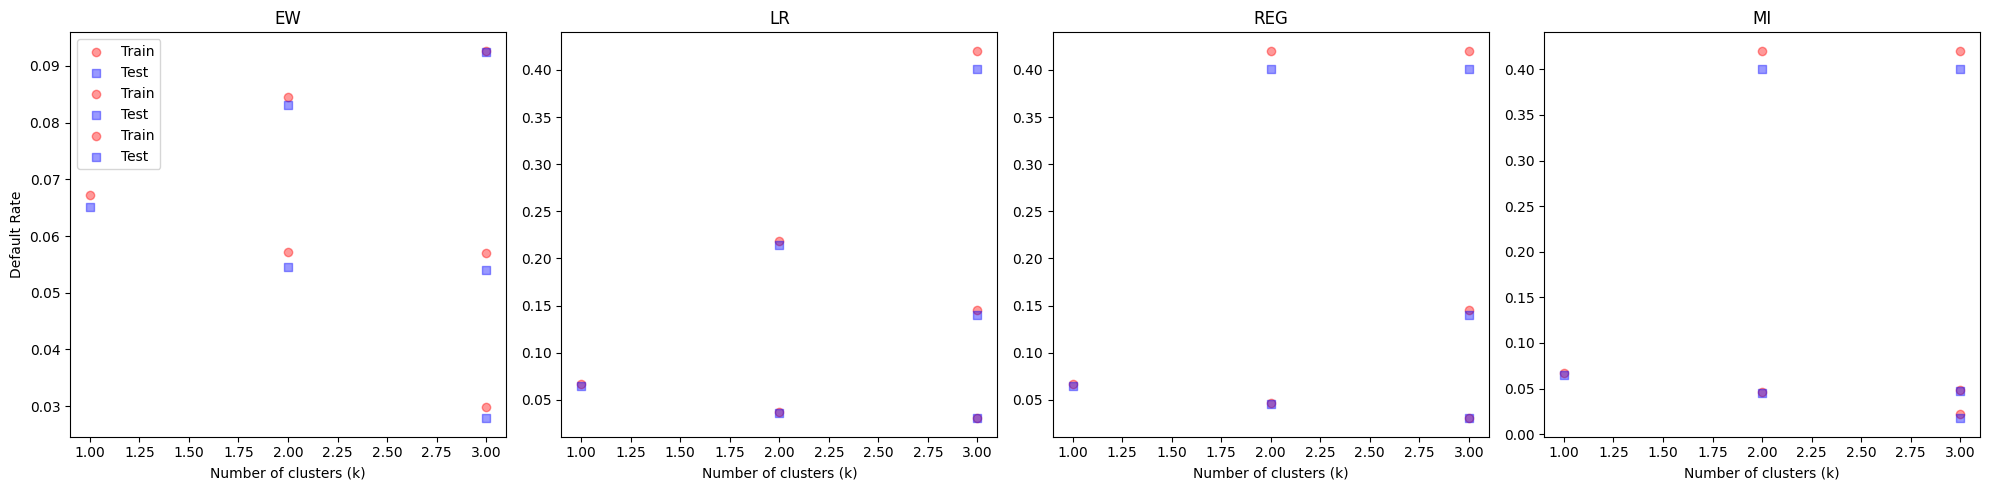

In [109]:
import matplotlib.pyplot as plt

def plot_default_rates(train_rate, test_rate, k_values):

    num_datasets = len(train_rate)
    fig, axes = plt.subplots(1, num_datasets, figsize=(20, 5))

    if num_datasets == 1:
        axes = [axes] 

    for idx, (name, rates) in enumerate(train_rate.items()):
        ax = axes[idx]
        ax.set_title(name)
        ax.set_xlabel('Number of clusters (k)')
        if idx == 0:
            ax.set_ylabel('Default Rate')

        for k in k_values:
            train_defaults = rates[k][0]
            test_defaults = test_rate[name][k][0]

            ax.scatter([k] * len(train_defaults), train_defaults, label='Train' if idx == 0 else "", color='red', marker='o', alpha=0.4)
            ax.scatter([k] * len(test_defaults), test_defaults, label='Test' if idx == 0 else "", color='blue', marker='s', alpha=0.4)

        if idx == 0:
            ax.legend()

    plt.tight_layout()
    plt.show()

plot_default_rates(rate_sets['Ordinary']['train'],rate_sets['Ordinary']['test'], k_values = range(1, 4))


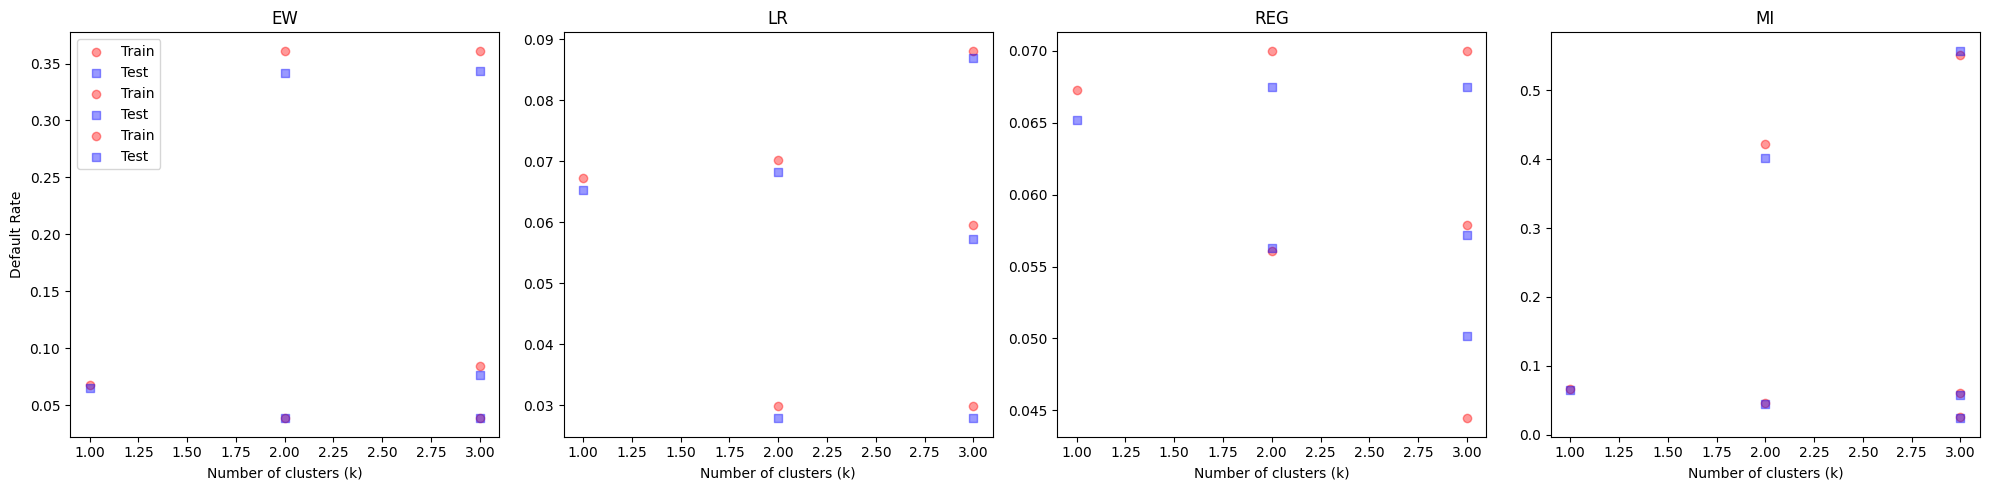

In [110]:
plot_default_rates(rate_sets['Quar']['train'],rate_sets['Quar']['test'], k_values = range(1, 4))

## Entropy

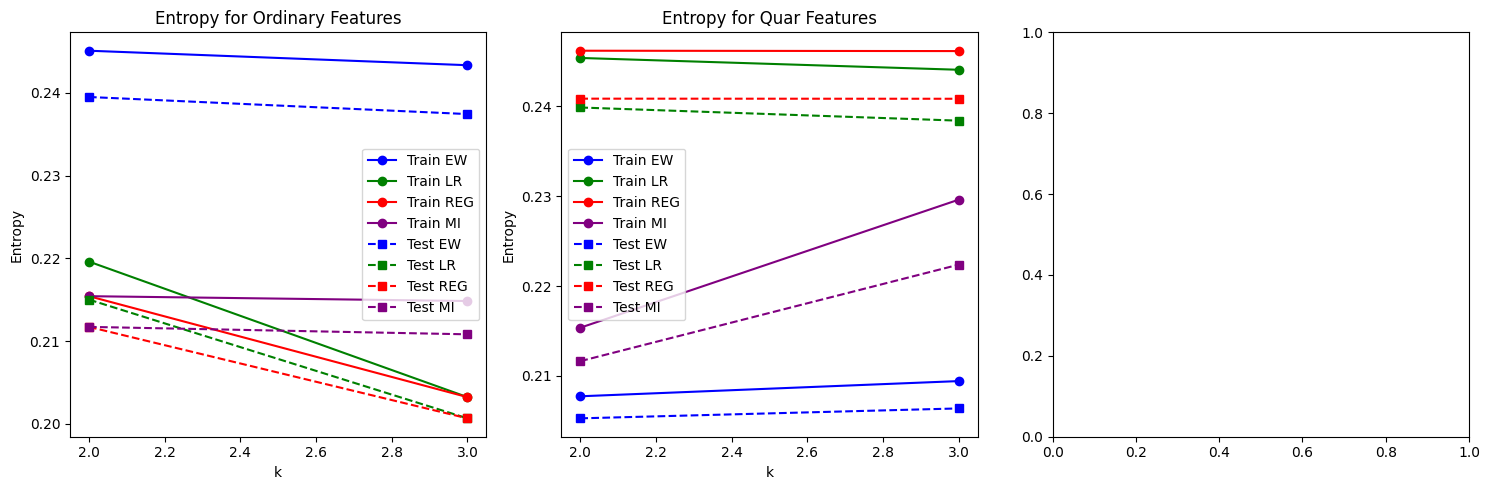

In [111]:
colors = {
    'EW': 'blue',
    'LR': 'green',
    'REG': 'red',
    'MI': 'purple'
}

def plot_entropy(data, label_prefix, line_type, ax):
    for label, k_dict in data.items():
        # 获取这个label的颜色
        color = colors[label]
        ks = sorted(k_dict.keys())
        second_elements = [values[1] for k, values in sorted(k_dict.items())][1:]
        ax.plot(ks[1:], second_elements, line_type, label=f'{label_prefix} {label}', color=color)
    ax.set_xlabel('k')
    ax.set_ylabel('Entropy')
    ax.legend()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 调用函数，传递颜色参数
plot_entropy(rate_sets['Ordinary']['train'], 'Train', '-o', axs[0])
plot_entropy(rate_sets['Ordinary']['test'], 'Test', 's--', axs[0])
axs[0].set_title('Entropy for Ordinary Features')

plot_entropy(rate_sets['Quar']['train'], 'Train', '-o', axs[1])
plot_entropy(rate_sets['Quar']['test'], 'Test', 's--', axs[1])
axs[1].set_title('Entropy for Quar Features')

# 注释掉的代码是因为图像中没有显示Cubic的数据
# plot_entropy(rate_sets['Cubic']['train'], 'Train', '-o', axs[2])
# plot_entropy(rate_sets['Cubic']['test'], 'Test', 's--', axs[2])
# axs[2].set_title('Entropy for Cubic Features')

plt.tight_layout()
plt.show()

In [112]:
import xgboost as xgb

def cluster_XGB(labeled_dfs, k_values, target_col='y'):
    model_results = {}

    for name, df in labeled_dfs.items():
        model_results[name] = {}

        cluster_label_cols = [f'k{k}' for k in k_values]

        for k in k_values:
            model_results[name][k] = []

            for cluster in range(k):
                cluster_label_col = f'k{k}'
                cluster_df = df[df[cluster_label_col] == cluster]
                y = cluster_df[target_col]

                X = cluster_df.drop(cluster_label_cols + [target_col], axis=1)

                xg_model = xgb.XGBClassifier(
                use_label_encoder=False, 
                eval_metric='logloss',
                max_depth=6,                
                min_child_weight=1,         
                subsample=0.8,              
                colsample_bytree=0.8,       
                learning_rate=0.01,         
                n_estimators=1000,          
                reg_alpha=0.01,             
                reg_lambda=1.0              
                )
                
                xg_model.fit(X, y)

                model_results[name][k].append(xg_model)

    return model_results

def cluster_logistic(labeled_dfs, k_values, target_col='y'):
    model_results = {}

    for name, df in labeled_dfs.items():
        model_results[name] = {}

        cluster_label_cols = [f'k{k}' for k in k_values]

        for k in k_values:
            model_results[name][k] = []

            for cluster in range(k):
                cluster_label_col = f'k{k}'
                cluster_df = df[df[cluster_label_col] == cluster]
                y = cluster_df[target_col]

                # 从特征集中删除所有的聚类标签列和目标列
                X = cluster_df.drop(cluster_label_cols + [target_col], axis=1)

                # 使用 Lasso 正则化（L1 penalty）
                lr_model = LogisticRegression(penalty='l1', C=0.1,solver='liblinear')
                lr_model.fit(X, y)

                model_results[name][k].append(lr_model)

    return model_results

    model_results = {}

    for name, df in labeled_dfs.items():
        model_results[name] = {}

        cluster_label_cols = [f'k{k}' for k in k_values]

        for k in k_values:
            model_results[name][k] = []

            for cluster in range(k):
                cluster_label_col = f'k{k}'
                cluster_df = df[df[cluster_label_col] == cluster]
                y = cluster_df[target_col]

                X = cluster_df.drop(cluster_label_cols, axis=1)

                lr_model = LogisticRegression( max_iter=1000)
                lr_model.fit(X, y)

                model_results[name][k].append(lr_model)

    return model_results

models_sets = {'Ordinary': {}, 'Quar': {}}
feature_sets = ('Ordinary', 'Quar')

for feature_set in feature_sets:
    train_df = train_dfs[feature_set]
    XGB_models = cluster_XGB(train_df, k_values, target_col='y')
    LR_models = cluster_logistic(train_df, k_values, target_col='y')
    models_sets[feature_set]['XGB'] = XGB_models
    models_sets[feature_set]['LR'] = LR_models 

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [113]:
from sklearn.metrics import roc_auc_score

def predict_and_evaluate(models, test_dfs, k_values, target_col='y'):
    auc_results = {}

    for name, models_dict in models.items():
        auc_scores = {}
        weighted_auc_scores = {}

        cluster_label_cols = [f'k{k}' for k in k_values]

        for k in k_values:
            models_list = models_dict[k]
            test_df = test_dfs[name]
            total_samples = len(test_df)

            auc_scores[k] = []
            weighted_sum_auc = 0

            for cluster, model in enumerate(models_list):
                cluster_df = test_df[test_df[f'k{k}'] == cluster]
                
                X_test = cluster_df.drop(cluster_label_cols + [target_col], axis=1)
                y_test = cluster_df[target_col]

                y_pred_proba = model.predict_proba(X_test)[:, 1]

                if len(np.unique(y_test)) > 1:
                    auc = roc_auc_score(y_test, y_pred_proba)
                    auc_scores[k].append(auc)

                    weight = len(cluster_df) / total_samples
                    weighted_sum_auc += weight * auc

            weighted_auc_scores[k] = weighted_sum_auc

        auc_results[name] = {
            'auc_scores': auc_scores,
            'weighted_auc_scores': weighted_auc_scores
        }

    return auc_results

auc_sets = {'Ordinary': {}, 'Quar': {}}

for feature_set in feature_sets:
    test_df = test_dfs[feature_set]
    XGB_models = models_sets[feature_set]['XGB']
    LR_models = models_sets[feature_set]['LR']
    result_xgb = predict_and_evaluate(XGB_models, test_df, k_values, target_col='y')
    result_logis = predict_and_evaluate(LR_models, test_df, k_values, target_col='y')
    auc_sets[feature_set]['XGB'] = result_xgb
    auc_sets[feature_set]['LR'] = result_logis



In [114]:
def create_auc_df(result_xgb, datasets, k_values):
    auc_scores_dict = {'K': list(k_values)}

    for dataset_name in datasets:
        auc_scores = []
        for k in k_values:
            auc_score = result_xgb.get(dataset_name, {}).get('weighted_auc_scores', {}).get(k)
            auc_scores.append(auc_score)
        auc_scores_dict[dataset_name] = auc_scores

    auc_df = pd.DataFrame(auc_scores_dict)
    
    return auc_df

def combine_auc_dfs(xgb_auc, lr_auc):
    combined_df = pd.concat([xgb_auc.set_index('K'), lr_auc.set_index('K')], axis=1, keys=['XGBoost', 'Logistic Regression'])
    combined_df.columns = pd.MultiIndex.from_tuples([col for col in combined_df.columns])
    return combined_df

def create_and_combine_auc_dfs(auc_sets, feature_sets, datasets, k_values):
    combined_dfs = {}
    for feature_set in feature_sets:
        xgb_auc = create_auc_df(auc_sets[feature_set]['XGB'], datasets, k_values)
        lr_auc = create_auc_df(auc_sets[feature_set]['LR'], datasets, k_values)
        combined_dfs[feature_set] = combine_auc_dfs(xgb_auc, lr_auc)

    return pd.concat(combined_dfs, keys=feature_sets)

feature_sets = ['Ordinary', 'Quar']
datasets = ['EW', 'LR', 'REG', 'MI']
k_values = range(1, 5)
combined = create_and_combine_auc_dfs(auc_sets, feature_sets, datasets, k_values)
combined 


XGBoost                               Logistic Regression  \
                  EW        LR       REG        MI                  EW   
         K                                                               
Ordinary 1  0.865017  0.865063  0.865132  0.865131            0.821076   
         2  0.860232  0.814797  0.819346  0.819582            0.822999   
         3  0.850707  0.781404  0.781404  0.805329            0.838728   
         4       NaN       NaN       NaN       NaN                 NaN   
Quar     1  0.864604  0.864818  0.864884  0.864744            0.851238   
         2  0.800327  0.857028  0.862384  0.818424            0.778341   
         3  0.800984  0.851417  0.860974  0.832735            0.779941   
         4       NaN       NaN       NaN       NaN                 NaN   

                                          
                  LR       REG        MI  
         K                                
Ordinary 1  0.821587  0.813410  0.825654  
         2  0.742889  0.743214  0.764326  
         3  0.689428  0.664388  0.770551  
         4       NaN       NaN       NaN  
Quar     1  0.851308  0.844112  0.843068  
         2  0.846736  0.839000  0.783249  
         3  0.843246  0.838467  0.810061  
         4       NaN       NaN       NaN

# Cluster on Postitive training set

In [115]:
feature_sets = {
    'Ordinary': {'EW': df_ew, 'LR': df_lr, 'REG': df_reg, 'MI': df_mi},
    'Quar': {'EW': df_quar_ew, 'LR': df_quar_lr, 'REG': df_quar_reg, 'MI': df_quar_mi}
}
k_values = range(1, 4)

train_dfs = {'Ordinary': {}, 'Quar': {}}
test_dfs = {'Ordinary': {}, 'Quar': {}}
models = {'Ordinary': {}, 'Quar': {}}

indices = df.index 
train_indices, test_indices = train_test_split(indices,test_size=0.2, random_state=42)

for feature_set, dfs in feature_sets.items():
    for name, df in dfs.items():
        train_df = df.loc[train_indices]
        test_df = df.loc[test_indices]

        pos_train_df = train_df[train_df['y'] == 1]
        nes_train_df = train_df[train_df['y'] == 0].copy()  
        labeled_pos_train_df, models = apply_kmeans_and_label(pos_train_df, k_values, random_state=42)

        original_train_test = nes_train_df.drop(['y','x12','x6'],axis = 1)
        original_train_test = original_train_test.drop([col for col in original_train_test.columns if col.startswith('k')], axis=1)

        original_test = test_df.drop(['y','x12','x6'],axis = 1)
        original_test = original_test.drop([col for col in original_test.columns if col.startswith('k')], axis=1)

        for k in k_values:
            nes_train_df.loc[:, f'k{k}'] = models[k].predict(original_train_test)
            test_df.loc[:, f'k{k}'] = models[k].predict(original_test)

        train_dfs[feature_set][name] = pd.concat([labeled_pos_train_df, nes_train_df], axis=0).sort_index()
        test_dfs[feature_set][name] = test_df

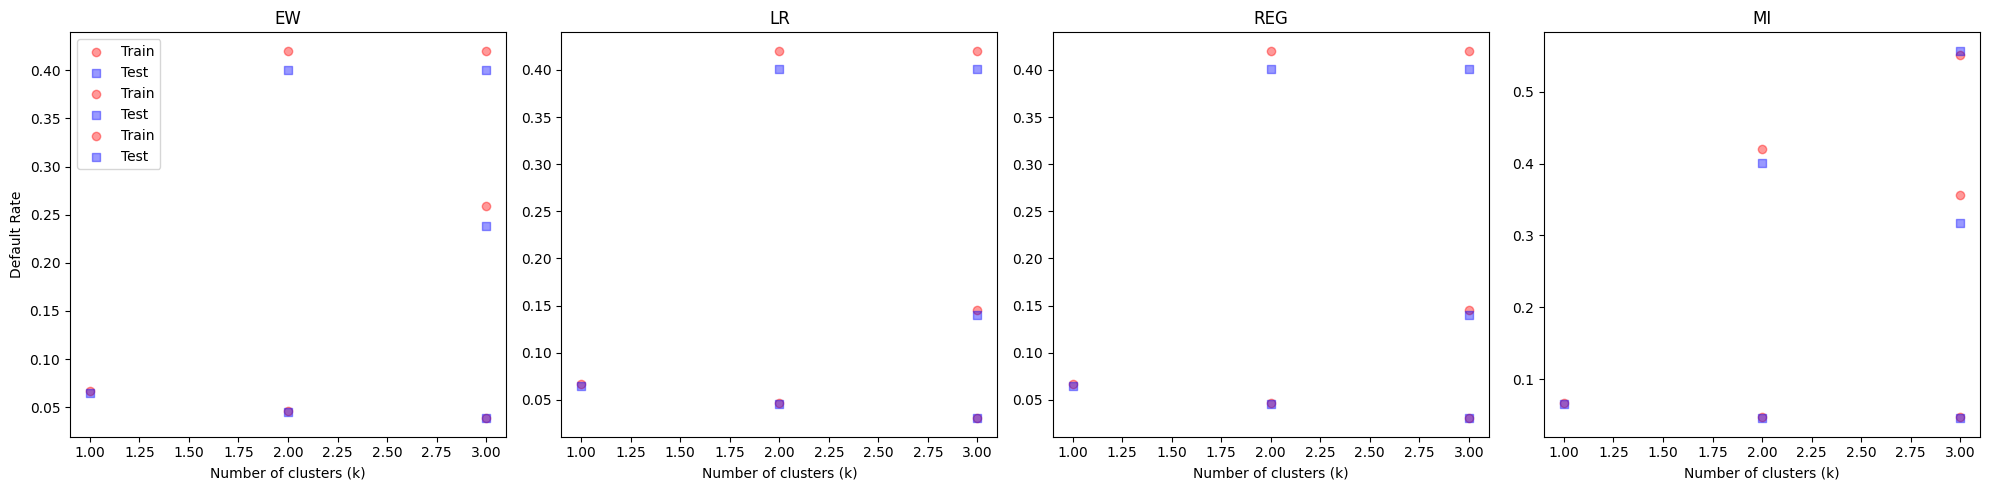

In [116]:
rate_sets = {'Ordinary': {}, 'Quar': {}}

for feature_set in feature_sets.keys():
    train_df = train_dfs[feature_set]
    test_df = test_dfs[feature_set]
    train_rate = calculate_rates(train_df, k_values, 'y')
    test_rate = calculate_rates(test_df, k_values, 'y')
    rate_sets[feature_set]['train'] = train_rate
    rate_sets[feature_set]['test'] = test_rate

plot_default_rates(rate_sets['Ordinary']['train'],rate_sets['Ordinary']['test'], k_values)    

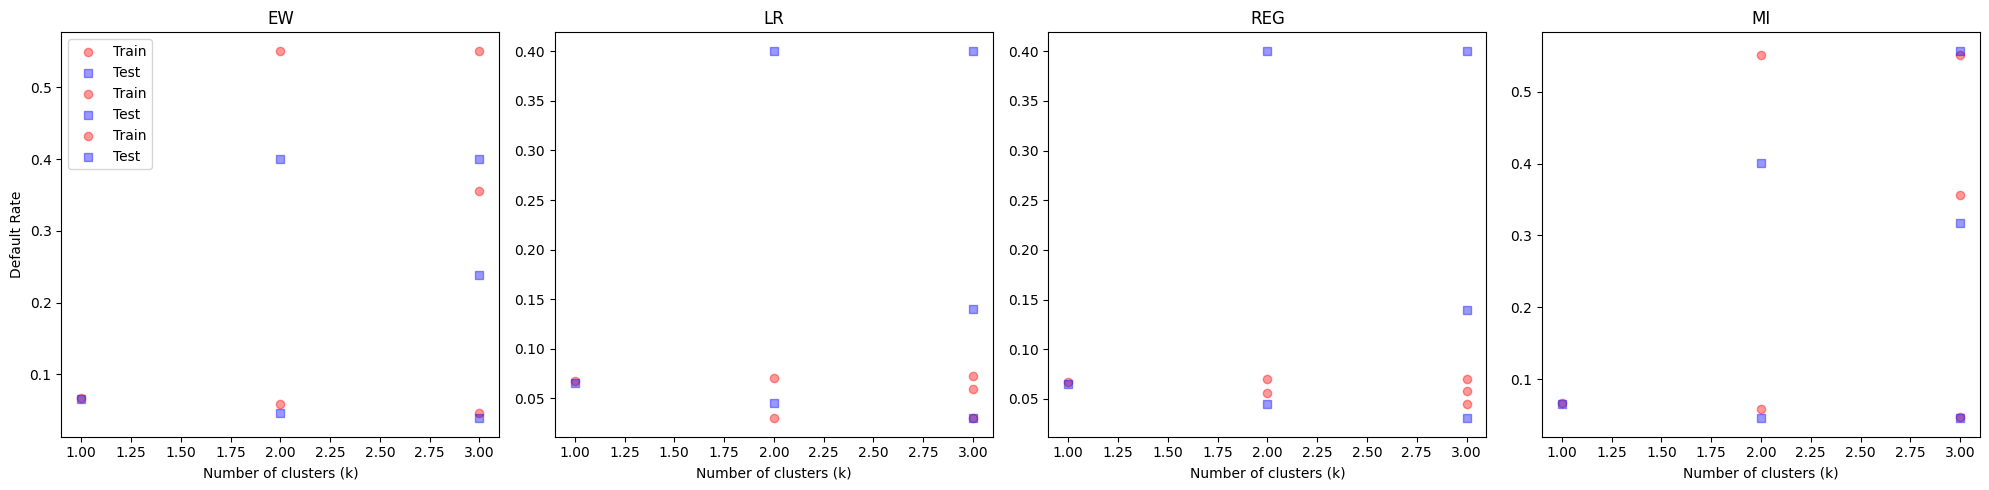

In [117]:
plot_default_rates(rate_sets['Quar']['train'],rate_sets['Ordinary']['test'], k_values)    

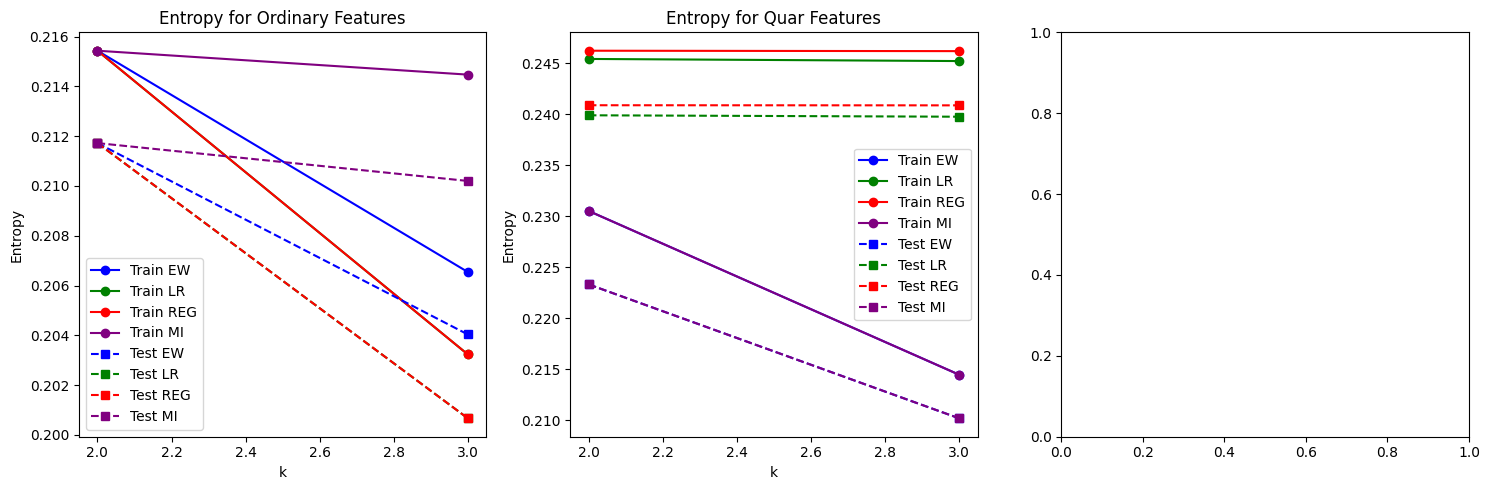

In [118]:
colors = {
    'EW': 'blue',
    'LR': 'green',
    'REG': 'red',
    'MI': 'purple'
}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plot_entropy(rate_sets['Ordinary']['train'], 'Train', '-o', axs[0])
plot_entropy(rate_sets['Ordinary']['test'], 'Test', 's--', axs[0])
axs[0].set_title('Entropy for Ordinary Features')

plot_entropy(rate_sets['Quar']['train'], 'Train', '-o', axs[1])
plot_entropy(rate_sets['Quar']['test'], 'Test', 's--', axs[1])
axs[1].set_title('Entropy for Quar Features')

# 注释掉的代码是因为图像中没有显示Cubic的数据
# plot_entropy(rate_sets['Cubic']['train'], 'Train', '-o', axs[2])
# plot_entropy(rate_sets['Cubic']['test'], 'Test', 's--', axs[2])
# axs[2].set_title('Entropy for Cubic Features')

plt.tight_layout()
plt.show()

In [119]:
models_sets = {'Ordinary': {}, 'Quar': {}}
feature_sets = ['Ordinary', 'Quar']

for feature_set in feature_sets:
    train_df = train_dfs[feature_set]
    XGB_models = cluster_XGB(train_df, k_values, target_col='y')
    LR_models = cluster_logistic(train_df, k_values, target_col='y')
    models_sets[feature_set]['XGB'] = XGB_models
    models_sets[feature_set]['LR'] = LR_models 

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [120]:
auc_sets = {'Ordinary': {}, 'Quar': {}}

for feature_set in feature_sets:
    test_df = test_dfs[feature_set]
    XGB_models = models_sets[feature_set]['XGB']
    LR_models = models_sets[feature_set]['LR']
    result_xgb = predict_and_evaluate(XGB_models, test_df, k_values, target_col='y')
    result_logis = predict_and_evaluate(LR_models, test_df, k_values, target_col='y')
    auc_sets[feature_set]['XGB'] = result_xgb
    auc_sets[feature_set]['LR'] = result_logis

datasets = ['EW', 'LR', 'REG', 'MI']
combined = create_and_combine_auc_dfs(auc_sets, feature_sets, datasets, k_values)
combined     


XGBoost                               Logistic Regression  \
                  EW        LR       REG        MI                  EW   
         K                                                               
Ordinary 1  0.865068  0.864993  0.864988  0.865071            0.821077   
         2  0.818743  0.818749  0.818869  0.818679            0.756730   
         3  0.798503  0.781520  0.781520  0.816012            0.725153   
Quar     1  0.864822  0.864727  0.864738  0.864823            0.851238   
         2  0.841829  0.857712  0.862033  0.841787            0.826022   
         3  0.816308  0.855373  0.861011  0.816205            0.797289   

                                          
                  LR       REG        MI  
         K                                
Ordinary 1  0.821587  0.813410  0.825649  
         2  0.755424  0.743214  0.764325  
         3  0.689430  0.664388  0.758903  
Quar     1  0.851309  0.843812  0.843091  
         2  0.846736  0.838985  0.814840  
         3  0.846332  0.838466  0.778928